## 1. Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

In [25]:
from google.colab import files
uploaded=files.upload()

Saving blogs_categories.csv to blogs_categories (1).csv


In [27]:
df = pd.read_csv('blogs_categories.csv')
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [26]:
df.describe()

,Unnamed: 0,len
count,19997.000000,19997.000000
mean,9998.000000,15.649047
std,5772.781002,4.982611
min,0.000000,7.000000
25%,4999.000000,11.000000
50%,9998.000000,15.000000
75%,14997.000000,18.000000
max,19996.000000,24.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [29]:
df['Labels']=df['Labels'].astype(str)
df['len']=df['Labels'].apply(len)
df['len']=df['Labels'].str.len()

In [30]:
df['len'] = df['Labels'].apply(len)
df

,Unnamed: 0,Data,Labels,len
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,11
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,11
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,11
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,11
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,11
...,...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,18
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,18
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,18
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,18


array([[<Axes: title={'center': 'len'}>]], dtype=object)

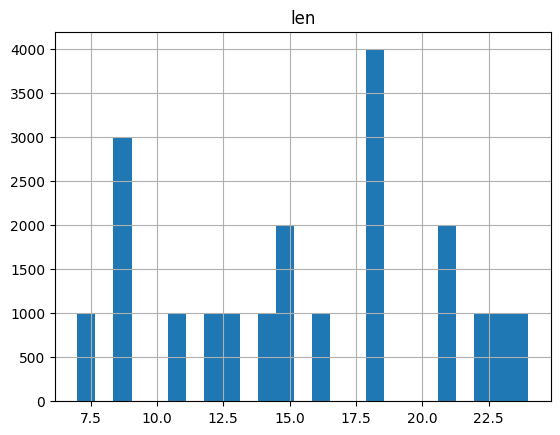

In [31]:
df.hist('len',bins=30)

In [32]:
def clean(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    token = word_tokenize(text)
    token = [x for x in token if x not in stopwords.words('english')]
    return ' '.join(token)

In [33]:
!pip install nltk

In [34]:
import nltk

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
df['Data'].dtype

dtype('O')

In [38]:
df['Data']=df['Data'].astype(str)

In [39]:
df['Data'] = df['Data'].apply(clean)

In [40]:
tfidf = TfidfVectorizer(max_features=2500)

In [41]:
x = tfidf.fit_transform(df['Data']).toarray()
y = df['Labels']

## 2. Naive Bayes Model for Text Classification
•	Split the data into training and test sets.

•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

•	Train the model on the training set and make predictions on the test set


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=100)

In [44]:
model = MultinomialNB()

In [45]:
model.fit(x_train,y_train)

MultinomialNB()

In [46]:
y_pred = model.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred)

0.8664

In [48]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.82      0.79       257
           comp.graphics       0.80      0.87      0.83       252
 comp.os.ms-windows.misc       0.86      0.85      0.86       283
comp.sys.ibm.pc.hardware       0.84      0.78      0.81       263
   comp.sys.mac.hardware       0.88      0.89      0.89       229
          comp.windows.x       0.86      0.91      0.89       238
            misc.forsale       0.84      0.88      0.86       256
               rec.autos       0.87      0.92      0.90       254
         rec.motorcycles       0.95      0.93      0.94       263
      rec.sport.baseball       0.94      0.95      0.95       256
        rec.sport.hockey       0.97      0.97      0.97       258
               sci.crypt       0.96      0.90      0.93       242
         sci.electronics       0.86      0.87      0.87       242
                 sci.med       0.92      0.92      0.92       238
         

## 3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.

•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

•	Examine the distribution of sentiments across different categories and summarize your findings.

## 4. Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

•	Discuss the performance of the model and any challenges encountered during the classification process.

•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [49]:
from textblob import TextBlob

In [50]:
def sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    if analysis.sentiment.polarity<0:
        return 'Negative'
    else:
        return 'Netural'

In [51]:
df['sentiment'] = df['Data'].apply(sentiment)

In [52]:
sent_dist = df.groupby('Labels')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sent_dist)

sentiment                 Negative  Netural  Positive
Labels                                               
alt.atheism               0.285000    0.000  0.715000
comp.graphics             0.263000    0.001  0.736000
comp.os.ms-windows.misc   0.259000    0.000  0.741000
comp.sys.ibm.pc.hardware  0.255000    0.002  0.743000
comp.sys.mac.hardware     0.274000    0.000  0.726000
comp.windows.x            0.282000    0.005  0.713000
misc.forsale              0.231000    0.000  0.769000
rec.autos                 0.254000    0.002  0.744000
rec.motorcycles           0.345000    0.000  0.655000
rec.sport.baseball        0.312000    0.001  0.687000
rec.sport.hockey          0.347000    0.001  0.652000
sci.crypt                 0.264000    0.000  0.736000
sci.electronics           0.252000    0.000  0.748000
sci.med                   0.282000    0.002  0.716000
sci.space                 0.276000    0.001  0.723000
soc.religion.christian    0.232698    0.000  0.767302
talk.politics.guns        0.

<Axes: xlabel='Labels'>

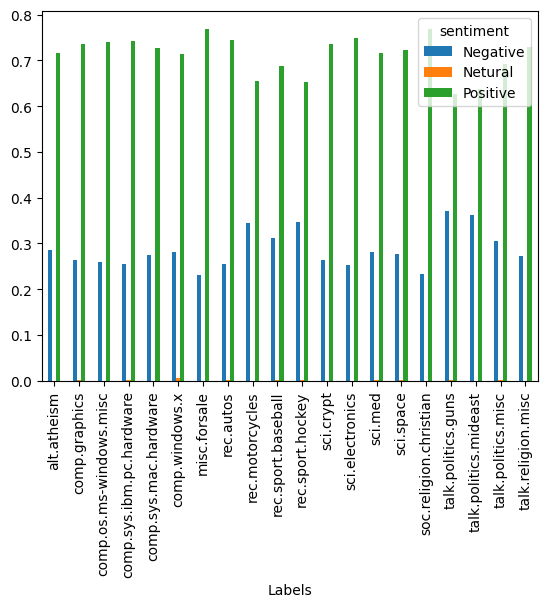

In [53]:
sent_dist.plot(kind='bar')

In [54]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.82      0.79       257
           comp.graphics       0.80      0.87      0.83       252
 comp.os.ms-windows.misc       0.86      0.85      0.86       283
comp.sys.ibm.pc.hardware       0.84      0.78      0.81       263
   comp.sys.mac.hardware       0.88      0.89      0.89       229
          comp.windows.x       0.86      0.91      0.89       238
            misc.forsale       0.84      0.88      0.86       256
               rec.autos       0.87      0.92      0.90       254
         rec.motorcycles       0.95      0.93      0.94       263
      rec.sport.baseball       0.94      0.95      0.95       256
        rec.sport.hockey       0.97      0.97      0.97       258
               sci.crypt       0.96      0.90      0.93       242
         sci.electronics       0.86      0.87      0.87       242
                 sci.med       0.92      0.92      0.92       238
         

In [55]:
accuracy_score(y_test,y_pred)

0.8664

In [56]:
sent_dist

sentiment,Negative,Netural,Positive
Labels,,,
alt.atheism,0.285000,0.000,0.715000
comp.graphics,0.263000,0.001,0.736000
comp.os.ms-windows.misc,0.259000,0.000,0.741000
comp.sys.ibm.pc.hardware,0.255000,0.002,0.743000
comp.sys.mac.hardware,0.274000,0.000,0.726000
comp.windows.x,0.282000,0.005,0.713000
misc.forsale,0.231000,0.000,0.769000
rec.autos,0.254000,0.002,0.744000
rec.motorcycles,0.345000,0.000,0.655000
